In [8]:
%pip uninstall pandas numpy -y
%pip install numpy pandas

Found existing installation: pandas 2.2.3
Uninstalling pandas-2.2.3:
  Successfully uninstalled pandas-2.2.3
Found existing installation: numpy 2.2.3
Uninstalling numpy-2.2.3:
  Successfully uninstalled numpy-2.2.3
Note: you may need to restart the kernel to use updated packages.
  Using cached numpy-2.2.3-cp313-cp313-macosx_14_0_x86_64.whl.metadata (62 kB)
  Using cached pandas-2.2.3-cp313-cp313-macosx_10_13_x86_64.whl.metadata (89 kB)
Using cached numpy-2.2.3-cp313-cp313-macosx_14_0_x86_64.whl (6.7 MB)
Using cached pandas-2.2.3-cp313-cp313-macosx_10_13_x86_64.whl (12.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 17.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 18.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load JSON Data
def load_json(file_path):
    with open(file_path, "r") as file:
        return json.load(file)

# Extract relevant fields from each trial
def extract_trial_data(trial):
    protocol = trial.get("protocolSection", {})  # Use .get() to handle missing keys
    
    return {
        "NCT ID": protocol.get("identificationModule", {}).get("nctId", "Unknown"),
        "Title": protocol.get("identificationModule", {}).get("briefTitle", "Unknown"),
        "Status": protocol.get("statusModule", {}).get("overallStatus", "Unknown"),
        "Phase": (
            protocol.get("designModule", {}).get("phases", ["NA"])[0] 
            if "phases" in protocol.get("designModule", {}) 
            else "NA"
        ),
        "Start Date": protocol.get("statusModule", {}).get("startDateStruct", {}).get("date", "Unknown"),
        "Completion Date": protocol.get("statusModule", {}).get("completionDateStruct", {}).get("date", "Unknown"),
        "Funding Source": protocol.get("sponsorCollaboratorsModule", {}).get("leadSponsor", {}).get("class", "Unknown"),
        "Study Type": protocol.get("designModule", {}).get("studyType", "Unknown"),
        "Enrollment": protocol.get("designModule", {}).get("enrollmentInfo", {}).get("count", 0),
        "Location": (
            protocol.get("contactsLocationsModule", {}).get("locations", [{}])[0].get("country", "Unknown")
            if protocol.get("contactsLocationsModule", {}).get("locations") 
            else "Unknown"
        ),
        "Treatment Type": (
            protocol.get("armsInterventionsModule", {}).get("interventions", [{}])[0].get("type", "Unknown")
            if protocol.get("armsInterventionsModule", {}) 
            else "Unknown"
        ),
    }


In [5]:
# Process full dataset
def process_trials(json_data):
    trials = []
    for entry in json_data:
        for trial in entry:
            trials.append(extract_trial_data(trial))
    return pd.DataFrame(trials)

# Load Data
file_path = "pancreatic cancer.json"  # Change this to your actual file path
json_data = load_json(file_path)



In [8]:
# Convert to DataFrame
df = process_trials(json_data)

# Save to CSV for easy review
df.to_csv("pancreatic_cancer_trials.csv", index=False)

Total Trials: 2572
Unique Phases: ['NA' 'PHASE2' 'PHASE1' 'PHASE3' 'EARLY_PHASE1' 'PHASE4']
Unique Funding Sources: ['OTHER' 'INDUSTRY' 'NIH' 'OTHER_GOV' 'NETWORK' 'INDIV' 'UNKNOWN']


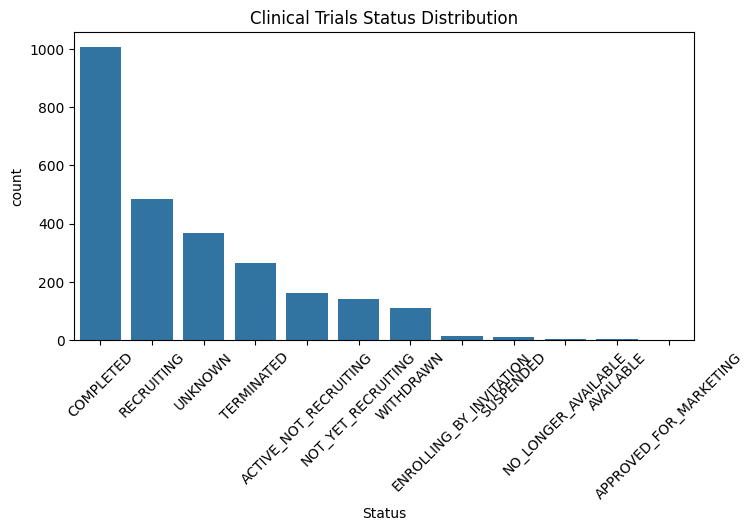

In [9]:
# Display Summary
print("Total Trials:", len(df))
print("Unique Phases:", df["Phase"].unique())
print("Unique Funding Sources:", df["Funding Source"].unique())

# Count Active vs. Completed Trials
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Status", order=df["Status"].value_counts().index)
plt.title("Clinical Trials Status Distribution")
plt.xticks(rotation=45)
plt.show()

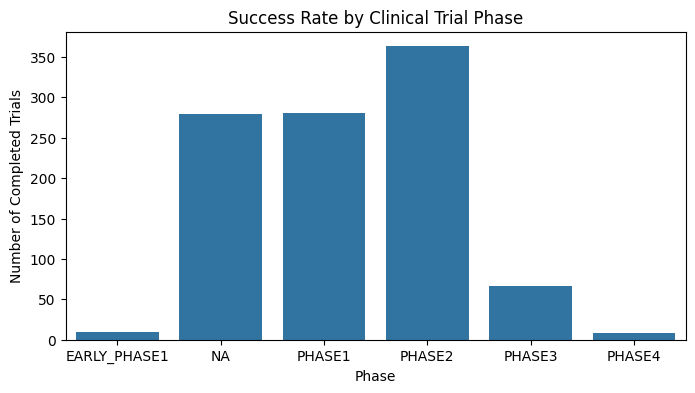

In [10]:
# Success Rate Analysis (Completed vs. Phase Progression)
df_success = df[df["Status"] == "COMPLETED"]
phase_counts = df_success["Phase"].value_counts().sort_index()

plt.figure(figsize=(8, 4))
sns.barplot(x=phase_counts.index, y=phase_counts.values)
plt.title("Success Rate by Clinical Trial Phase")
plt.xlabel("Phase")
plt.ylabel("Number of Completed Trials")
plt.show()

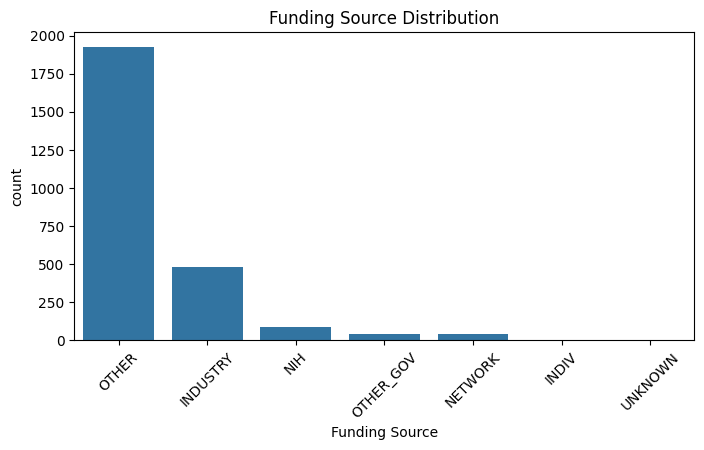

In [11]:
# Funding Source Analysis
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Funding Source", order=df["Funding Source"].value_counts().index)
plt.title("Funding Source Distribution")
plt.xticks(rotation=45)
plt.show()


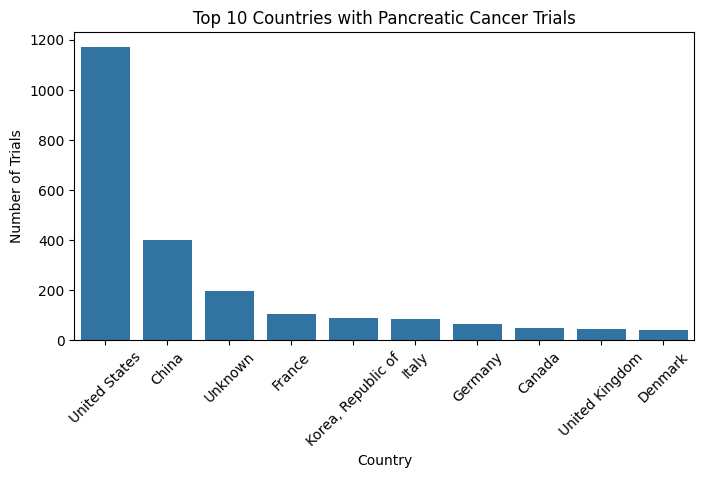

In [12]:
# Geographic Distribution
geo_counts = df["Location"].value_counts().head(10)  # Top 10 countries
plt.figure(figsize=(8, 4))
sns.barplot(x=geo_counts.index, y=geo_counts.values)
plt.title("Top 10 Countries with Pancreatic Cancer Trials")
plt.xlabel("Country")
plt.ylabel("Number of Trials")
plt.xticks(rotation=45)
plt.show()

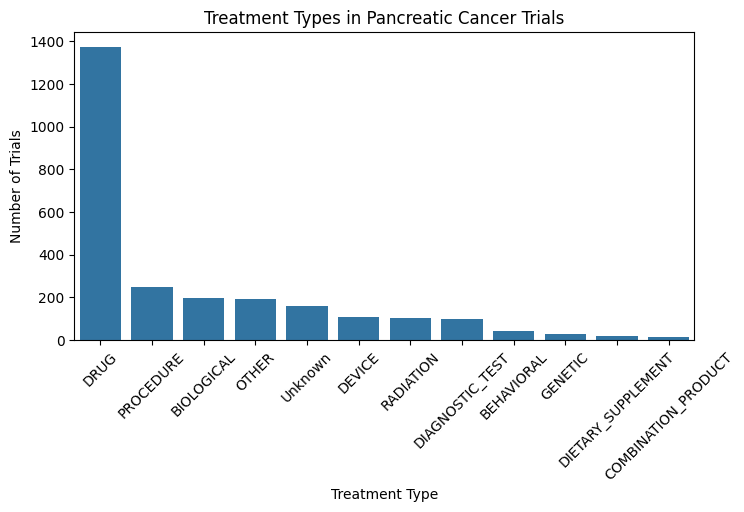

In [13]:
# Treatment Innovations
treatment_counts = df["Treatment Type"].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=treatment_counts.index, y=treatment_counts.values)
plt.title("Treatment Types in Pancreatic Cancer Trials")
plt.xlabel("Treatment Type")
plt.ylabel("Number of Trials")
plt.xticks(rotation=45)
plt.show()

In [3]:
%pip install folium

  Using cached folium-0.19.5-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached branca-0.8.1-py3-none-any.whl.metadata (1.5 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached xyzservices-2025.1.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached MarkupSafe-3.0.2-cp313-cp313-macosx_10_13_universal2.whl.metadata (4.0 kB)
  Using cached charset_normalizer-3.4.1-cp313-cp313-macosx_10_13_universal2.whl.metadata (35 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.1.31-py3-none-any.whl.metadata (2.5 kB)
Using cached folium-0.19.5-py2.py3-none-any.whl (110 kB)
Using cached branca-0.8.1-py3-none-any.whl (26 kB)
Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached xyzservices-2025.1.0-py3-none-any.whl (88 kB)
Using cached certi

In [5]:
%pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Load the dataset
file_path = "all_disease_procesed.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Create a base map centered globally
m = folium.Map(location=[20, 0], zoom_start=2)

# Define colors for each disease
disease_colors = {
    "pancreatic_cancer": "red",
    "chagas_disease": "blue",
    "endometriosis": "purple",
    "drug_resistant_tuberculosis": "green",
    "duchenne_muscular_dystrophy": "orange",
}

# Create a dictionary for feature groups (for filtering)
disease_layers = {disease: folium.FeatureGroup(name=disease.replace("_", " ").title()) for disease in disease_colors.keys()}

# Add markers for each disease to its respective feature group
for _, row in df.iterrows():
    disease = row["Disease"].lower().replace(" ", "_")
    if disease in disease_layers:  # Ensure the disease exists in our dictionary
        color = disease_colors[disease]
        folium.Marker(
            location=[0, 0],  # Placeholder since we don't have coordinates
            popup=f"{row['Disease']} - {row['Locations']}",
            icon=folium.Icon(color=color),
        ).add_to(disease_layers[disease])

# Add each disease layer to the map
for layer in disease_layers.values():
    layer.add_to(m)

# Add layer control to toggle diseases on/off
folium.LayerControl().add_to(m)

# Save and display the map
m.save("clinical_trials_selector_map.html")
m


In [6]:
import pandas as pd
import folium
import time
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from folium.plugins import MarkerCluster

# Load the dataset
file_path = "all_disease_procesed.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Extract unique locations
df["Cleaned_Location"] = df["Locations"].str.split(",").str[-2:].apply(lambda x: ", ".join(x).strip() if len(x) == 2 else None)
df = df.dropna(subset=["Cleaned_Location"])

# Initialize geocoder
geolocator = Nominatim(user_agent="clinical_trials_mapper")

# Dictionary to store geocoded locations
location_coords = {}

# Function to get coordinates with retry handling
def get_coordinates(location):
    try:
        loc = geolocator.geocode(location, timeout=10)
        if loc:
            return (loc.latitude, loc.longitude)
    except GeocoderTimedOut:
        time.sleep(1)
        return get_coordinates(location)  # Retry once if timeout occurs
    return (None, None)

# Check if geocoded locations already exist to avoid redundant API calls
geocoded_file = "geocoded_locations.csv"
try:
    geocoded_df = pd.read_csv(geocoded_file)
    location_coords = dict(zip(geocoded_df["Location"], zip(geocoded_df["Latitude"], geocoded_df["Longitude"])))
except FileNotFoundError:
    pass  # Proceed with geocoding if file does not exist

# Geocode only missing locations
unique_locations = df["Cleaned_Location"].dropna().unique()
for location in unique_locations:
    if location not in location_coords:
        lat, lon = get_coordinates(location)
        location_coords[location] = (lat, lon)
        time.sleep(1)  # Avoid API rate limits

# Save geocoded locations to prevent re-fetching
geo_df = pd.DataFrame(location_coords.items(), columns=["Location", "Coords"])
geo_df["Latitude"], geo_df["Longitude"] = zip(*geo_df["Coords"])
geo_df.drop(columns=["Coords"], inplace=True)
geo_df.to_csv(geocoded_file, index=False)

# Merge geocoded coordinates back into the dataset
df["Latitude"] = df["Cleaned_Location"].map(lambda loc: location_coords.get(loc, (None, None))[0])
df["Longitude"] = df["Cleaned_Location"].map(lambda loc: location_coords.get(loc, (None, None))[1])

# Remove rows with missing coordinates
df_cleaned = df.dropna(subset=["Latitude", "Longitude"])

# Define colors for each disease
disease_colors = {
    "pancreatic_cancer": "red",
    "chagas_disease": "blue",
    "endometriosis": "purple",
    "drug_resistant_tuberculosis": "green",
    "duchenne_muscular_dystrophy": "orange",
}

# Create a folium map centered globally
map_center = [df_cleaned["Latitude"].mean(), df_cleaned["Longitude"].mean()]
m = folium.Map(location=map_center, zoom_start=2)

# Create a dictionary for feature groups (for filtering by disease)
disease_layers = {disease: folium.FeatureGroup(name=disease.replace("_", " ").title()) for disease in disease_colors.keys()}

# Add markers for each disease to its respective feature group
for _, row in df_cleaned.iterrows():
    disease = row["Disease"].lower().replace(" ", "_")
    if disease in disease_layers:
        color = disease_colors[disease]
        folium.Marker(
            location=[row["Latitude"], row["Longitude"]],
            popup=f"{row['Disease']} - {row['Locations']}",
            icon=folium.Icon(color=color),
        ).add_to(disease_layers[disease])

# Add each disease layer to the map
for layer in disease_layers.values():
    layer.add_to(m)

# Add layer control to toggle diseases on/off
folium.LayerControl().add_to(m)

# Save and display the map
m.save("clinical_trials_map.html")
m
